# Building a model

In this notebook we'll implement linear regression to predict the mpg (miles per gallon) based on the parameters in the mpg-dataset. This notebook (and the following python-file containing the streamlit app) are examples. In the next notebook you can apply all you've absorbed here on the titanic dataset!

## Data import and cleaning

Importing is a basic copy-paste of the previous notebook. We've added the first column as an index in stead of a regular column though...

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mpg = pd.read_csv('files/mpg.csv', index_col=0)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


First we'll be splitting the data in X (the parameters) and Y (what we want to predict.) First print all column names...

In [17]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

And copy and edit the ones we'll be using.

We'll remove:

- 'cty' and 'hwy' because they are the target variables
- 'manufacturer' and 'model' because they are not useful for the model

 (Stricly speaking only hwy, highway miles per gallon, is the target variable, but cty, city miles per gallon, would be too good a predictor. It would dominate the model.)

We'll keep:

- 'displ': engine displacement in liters
- 'year': year of manufacture
- 'cyl': number of cylinders
- 'trans': type of tranmission *
- 'drv': type of drive train *
- 'fl': fuel type *
- 'class': type of car *

There is one problem though: trans, drv, fl and class are strings, not numbers. This can be fixed by encoding them (compact = 1, suv = 2, ...). That however introduces bias: 1 is numerically less than 2. This implies a relionship that does exist for numercial values (a car built in 1999 is older than a car built in 2004), but not in type of car (1 may be smaller and lighter than 2, but that relationship won't hold up for 2 and 3.)

A solution would be on hot encoding, but that leads to parameter explosion. Since we won't expect the model to be very good we'll just drop these columns now and go over bias and one hot encoding later on.

In [18]:
x_1 = mpg[[ 'displ', 'year', 'cyl']]
y_1 = mpg['hwy']


## Building the model

Next we'll split the data in a train and test set. For this we'll be using sci-kit learn.

(A lot more on overfitting will follow in a later chapter).

In [19]:
from sklearn.model_selection import train_test_split

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1, y_1, test_size = 0.3)


And just like that we're ready to create a model!

In [31]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(x_train_1, y_train_1)
print(model_1.coef_)

[-2.40916388  0.20325162 -1.15248893]


This presents us with 3 coefficients. These give the influence of that parameter on the final model. They are:

* Displacement: -2.475
* Year: 0.150
* Cylinders: -0.947

(You may get different values, but they should be around the same order.)

This means that displacement has a large, negative influence. Which makes sense, bigger engines use more gas and have lower miles per gallon. Year has a small positive influence, so newer cars do more miles per gallon. More cylinders also mean less miles (since they use more fuel).

What would the coefficient have been if we kept cty in there?

In [27]:
x_2 = mpg[[ 'displ', 'year', 'cyl', 'cty']]
y_2 = mpg['hwy']
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size = 0.3)

model_2 = LinearRegression()
model_2.fit(x_train_2, y_train_2)
print(model_2.coef_)

[-0.09127046  0.06262775  0.14707238  1.39765117]


The influence of the others goes down, the influence of cty is the biggest. We'll keep this model on hand.

(Fun fact, if you re-run the above cell, the coefficients will change. If you rerun the cell above where we calculate the coefficients for the other model they don't change when you run it again. Why is that?

[thinking-link](https://www.youtube.com/watch?v=5dlubcRwYnI)

"train_test_split" We're splitting the data again. This is done randomly, so we get a different training-set (and thus different results) everytime we run this cell. This doesn't happen in the cell before because it only contains training, not splitting. This can be avoided by setting a random seed (which you should do to get repeatable results).)

By the way, a better way of showing these coefficients:

In [ ]:

pd.DataFrame(model_1.coef_, x_1.columns, columns = ['Coeff'])

,Coeff
displ,-2.474925
year,0.150346
cyl,-0.947282


## Predictions

The models we made never saw the actual (known) values for the test-set. So how well would it be able to predict these?

In [33]:
predictions_1 = model_1.predict(x_test_1)
predictions_1

array([17.54538797, 17.68823786, 23.70502804, 14.89530771, 19.13373618,
       30.24843438, 19.13373618, 15.51999037, 26.2570418 , 29.04385244,
       27.45550423, 15.61805687, 21.77769694, 28.41916978, 30.24843438,
       28.90100256, 29.04385244, 29.38283533, 29.28476883, 23.46411165,
       29.28476883, 24.81154348, 17.68823786, 27.45550423, 28.41916978,
       24.3297107 , 24.3297107 , 22.74136249, 28.90100256, 30.24843438,
       23.84787793, 29.38283533, 30.24843438, 15.61805687, 22.98227888,
       23.12512876, 29.04385244, 14.89530771, 29.28476883, 15.76090676,
       23.84787793, 28.90100256, 21.29586416, 24.18686081, 23.12512876,
       19.13373618, 23.12512876, 23.12512876, 17.68823786, 26.73275507,
       24.08879431, 24.18686081, 16.09988965, 17.30447158, 28.90100256,
       28.90100256, 19.13373618, 26.2570418 , 24.81154348, 19.13373618,
       16.9654887 , 15.61805687, 24.18686081, 24.90960998, 23.84787793,
       27.89136351, 30.24843438, 14.41347493, 22.74136249, 21.77

Simply printing the predicted values isn't that helpfull. Perhaps a scatterplot vs the actual values?

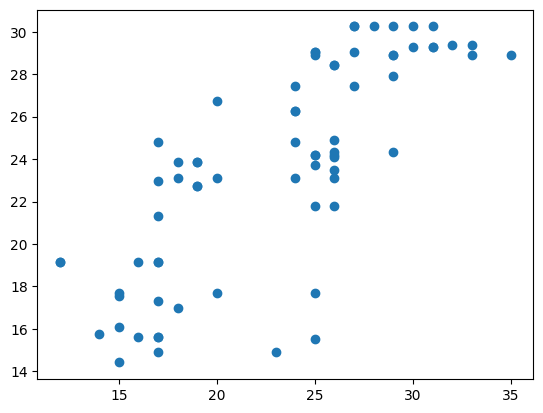

In [34]:
plt.scatter(y_test_1, predictions_1)

In a perfect model these should all be on the diagonal starting bottom left and going upper right. That is not the case. Perhaps the other model is better?

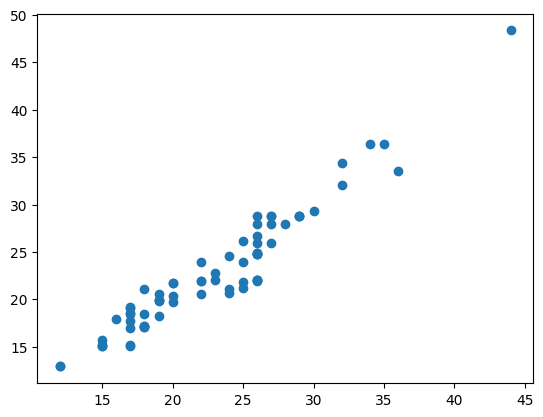

In [35]:
predictions_2 = model_2.predict(x_test_2)
plt.scatter(y_test_2, predictions_2)

Suppose I see a car that has 4 cylinders, an engine displacement of 2.0 and is built in 2024, what would the expected cty be according to the first model?

In [37]:
new_car = pd.DataFrame(data = [[2.0, 2000, 4]], columns = ['displ', 'year', 'cyl'])

model_1.predict(new_car)

array([28.6224214])

## Parameters on the model

We noticed that the second model is better than the first, but how much better? Can this be quantified?

A good way af measuring this is modeling the residuals. If there is a normal spread than our models models every relationship in the data.

(array([ 1.,  2.,  7.,  9., 13., 14., 14.,  2.,  3.,  6.]),
 array([-4.36260591, -3.51914177, -2.67567764, -1.8322135 , -0.98874936,
        -0.14528523,  0.69817891,  1.54164305,  2.38510719,  3.22857132,
         4.07203546]),
 <BarContainer object of 10 artists>)

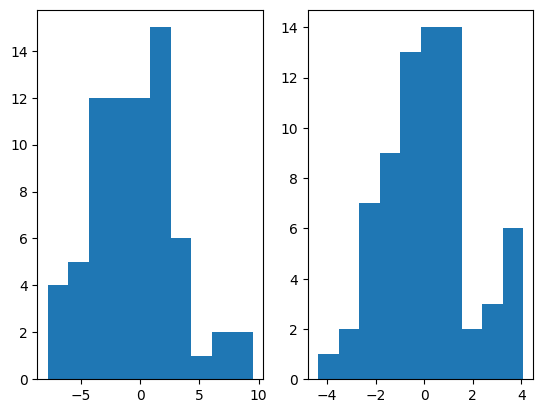

In [43]:
plt.subplot(1, 2, 1)
plt.hist(y_test_1 - predictions_1)
plt.subplot(1, 2, 2)
plt.hist(y_test_2 - predictions_2)

They look similar but if you look at the bottom axis you'll notice the first model has a much wider spread. This implies the second model is better.

The bump on the right are the two-seaters, small cars with low hwy. Since we dropped the class of the cars (it was text) this relationship is not in our model.

Interpreting graphs will always feel a bit random. Luckily there are numbers we can calculate!

In [44]:
from sklearn import metrics

mae_1 = metrics.mean_absolute_error(y_test_1, predictions_1)
mse_1 = np.sqrt(metrics.mean_squared_error(y_test_1, predictions_1))
mae_2 = metrics.mean_absolute_error(y_test_2, predictions_2)
mse_2 = np.sqrt(metrics.mean_squared_error(y_test_2, predictions_2))

mae_1, mse_1, mae_2, mse_2

(2.9442132287896006, 3.6481427640879036, 1.417972714962251, 1.822126954586819)

The errors are clearly lower for the second model, but still not very good. Which kind of makes sense, as we're trying to predict based on 235 rows (tenfold of that would be a start for a decent model).

## Exporting the model

Let's store this model for later usage in our streamlit-app. To export a model we'll store it as pickle-file, which is derived from pickling as you do with veggies in summer to keep them edible in winter (or the next summer, or maybe even 30 years from now).

In [49]:
import pickle

with open('files/mpg_model.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model_1, file)

Using it would come down to...

In [52]:
with open('files/mpg_model.pkl', 'rb') as file: 
      
    # Call load method to deserialze 
    model_3 = pickle.load(file) 
  
model_3.predict(new_car)

array([28.6224214])

Our model is 1kb in size. Quite the difference compared to the LLM's of [code llama](https://ai.meta.com/blog/code-llama-large-language-model-coding/).

Links:

https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/

https://www.geeksforgeeks.org/how-to-use-pickle-to-save-and-load-variables-in-python/
